In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Libreria para estimar regresión
import statsmodels.formula.api as sm

# Libreria para metricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Libreria para separar en train y test
from sklearn.model_selection import train_test_split

# Libreria para estandarizar la data
from sklearn.preprocessing import StandardScaler

# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)

In [2]:
# Levanto data
url = "https://raw.githubusercontent.com/xlisouski/DataCoder/main/train.csv"
df = pd.read_csv(url, sep=",")

# Variable Target: SalePrice
La variable objetivo es de tipo **numérica**, por lo que el modelo a desarrollar será de tipo **Aprendizaje Supervisado: Regresión**. 
<br> <br/>
A continuación se presentarán algunas estadísticas para entender el comportamiento, formato y distribución de esta variable. 

/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/gerick/Coder/Data_Science/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribución de SalePrice transformado a Logaritmo')

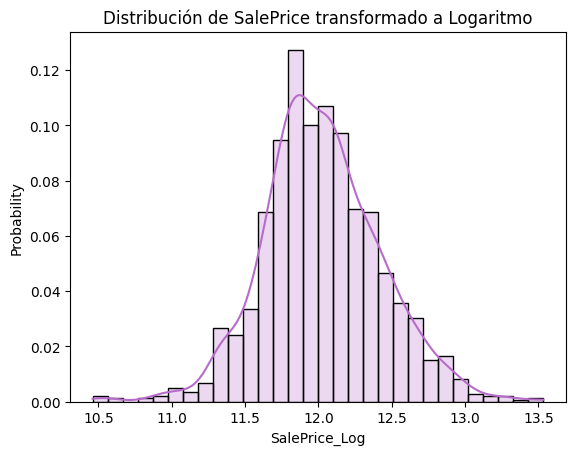

In [3]:
# Primero genero la variable logaritmica
df["SalePrice_Log"] = np.log(df["SalePrice"])

# Luego grafico
plt.figure()
# Histograma
sns.histplot(
    data=df,
    x="SalePrice_Log",
    bins=30,
    alpha=0.25,
    kde=True,
    stat="probability",
    color="#B76BCB",
)
plt.title("Distribución de SalePrice transformado a Logaritmo")

# Feature selection: Filter Feature Selection 
## Correlación con el Target
Se calcula el coeficiente de correlación de los Features con el target y se ordena de mayor a menor valor absoluto. 
<br>
**Aclaración:** Sólo sirve para features **numéricas**, así que en caso de ser categóricas combiene realizar alguna transformación. 

## ¿Cómo transformo categorías a números? 
Algunos métodos: 
1. **One-Hot (One-Hot Encoding):** Crea una columna binaria para cada categoría en la variable original. Tener cuidado cuando la variable tiene demasiadas categorías posibles porque se pueden generar muchas features. 
2. **Target Encoding:** A cada categoría se asigna une mátrica que tiene relación con el target (ejemplo, promedio, mediana). Tener cuidado si hay categorías con muy pocos registros ya que las métricas pueden ser no representativas.  

## Identifiquemos qué variables categóricas tenemos que trabajar. 

In [4]:
features_categoricas = df.select_dtypes(include=["object"])
features_categoricas.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [5]:
# Cuántos valores distintos tiene cada categoría?
valores_distintos = features_categoricas.nunique()
print(valores_distintos.sort_values(ascending=False))

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64


# One-Hot Encoding
Generaremos variables binarias para las categorías de las variables categóricas con 5 valores distintos o menos. 

In [6]:
# Primero las selecciono
col_aTransformar = valores_distintos.index[valores_distintos <= 5]
col_aTransformar

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'BldgType', 'MasVnrType', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature'],
      dtype='object')

In [7]:
# Patra transformarlas, vamos a usar el método get_dummies de pandas:
df_dummies = pd.get_dummies(df[col_aTransformar], drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [8]:
print(df.shape, df_dummies.shape)

(1460, 82) (1460, 78)


In [9]:
# Junto los resultados
df = pd.concat([df, df_dummies], axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,1,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,1,0,0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,1,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,1,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,1,0,0,0,0,0,0,0,0


# Target Encoding 
Las variables con más de 5 valores posibles les haremos un tratamiento de Target Encoding, pero de manera más personalizada, para asegurarnos que haya cantidad suficiente de registros para calcular promedios o medianas. 

In [10]:
# Para el resto de las variables, evaluemos el uso de Target Encoding.
# Veamos el ejemplo de la variable Foundation
# Foundation: Type of foundation (base sobre la cual se construye la estructura de la vivienda)
resultados = (
    df.groupby("Foundation")
    .agg(
        Cant=("SalePrice", "count"),
        Promedio=("SalePrice", "mean"),
        Mediana=("SalePrice", "median"),
    )
    .reset_index()
)
resultados
# Como hay muy pocas casas con Slab, Stone o Wood, vamos a juntarlos en una misma categoría llamada "otros"

,Foundation,Cant,Promedio,Mediana
0,BrkTil,146,132291.075342,125250.0
1,CBlock,634,149805.714511,141500.0
2,PConc,647,225230.442040,205000.0
3,Slab,24,107365.625000,104150.0
4,Stone,6,165959.166667,126500.0
5,Wood,3,185666.666667,164000.0


In [11]:
# Genero la nueva variable
df["Foundation_Agg"] = np.where(
    df["Foundation"].isin(["BrkTil", "CBlock", "PConc"]), df["Foundation"], "Otro"
)
# Genero la nueva agrupación
resultados = (
    df.groupby("Foundation_Agg")
    .agg(
        Cant=("SalePrice", "count"),
        Promedio=("SalePrice", "mean"),
        Mediana=("SalePrice", "median"),
    )
    .reset_index()
)
resultados

,Foundation_Agg,Cant,Promedio,Mediana
0,BrkTil,146,132291.075342,125250.0
1,CBlock,634,149805.714511,141500.0
2,Otro,33,125137.272727,109900.0
3,PConc,647,225230.442040,205000.0


In [12]:
# Joineo la mediana
resultados.rename(columns={"Mediana": "Mediana_Foundation"}, inplace=True)
df = df.merge(
    resultados[["Foundation_Agg", "Mediana_Foundation"]],
    left_on="Foundation_Agg",
    right_on="Foundation_Agg",
    how="left",
)

# Variables con factor tiempo
Generalmente, las variables que tienen asociada algún tipo de fecha no aportan demasiado valor agregado por si misma. Lo que realmente genera una diferencia es lo que construimos a partir de ellas. 
<br> <br/>
En este caso, tenemos disponible la siguiente información respecto al tiempo: 
* YrSold: Año de venta 
* YearBuilt: Fecha de origen de la construcción de la vivienda 
* YearRemodAdd: Fecha en que se remodeló la vivienda 
* GarageYrBlt: Año en que se construyó el garage 

In [13]:
# Construcción de las variables :
df["Antig_Viv"] = df["YrSold"] - df["YearBuilt"]
df["Antig_Rem"] = df["YrSold"] - df["YearRemodAdd"]
df["Antig_Garage"] = np.where(
    (df["GarageYrBlt"] > df["YrSold"]) | (df["GarageYrBlt"].isnull()),
    -999,
    df["YrSold"] - df["GarageYrBlt"],
)

# Nombres en features
No es recomendable que los nombres de features empiecen en números o en signos extraños, ya que pueden traer problemas en el uso de ciertas funciones. 
Cambiemos el nombre de algunas variables que pueden generar problemas.

In [14]:
# Filtrar las columnas cuyo primer carácter es un número
columnas_con_numero = [col for col in df.columns if col[0].isdigit()]

# Imprimir las columnas con números en el primer carácter
print(columnas_con_numero)

['1stFlrSF', '2ndFlrSF', '3SsnPorch']


In [15]:
# Vamos a renombrarlas
df = df.rename(columns={"1stFlrSF": "V_1stFlrSF"})
df = df.rename(columns={"2ndFlrSF": "V_2ndFlrSF"})
df = df.rename(columns={"3SsnPorch": "V_3SsnPorch"})

# Matriz de Correlación
Con las variables numéricas que ya teníamos disponibles, y las transformaciones que realizamos, vamos a calcular la matriz de correlación con la variable target para seleccionar las variables con mayor relación con el target. 

In [16]:
# Selecciono las variables que quiero analizar
variables_anios = ["YrSold", "YearBuilt", "YearRemodAdd", "GarageYrBlt"]
target_nousar = ["SalePrice"]
agg_nousar = ["Foundation_Agg"]

df_analizar = df[list(set(df.columns) - set(features_categoricas))]
df_analizar = df_analizar[list(set(df_analizar.columns) - set(variables_anios))]
df_analizar = df_analizar[list(set(df_analizar.columns) - set(target_nousar))]
df_analizar = df_analizar[list(set(df_analizar.columns) - set(agg_nousar))]

# Calculo matriz de correlación
matriz_correlacion = df_analizar.corr(method="pearson")
# Selecciono a la variable target para estudiar únicamente correlación con ella
matriz_correlacion_target = matriz_correlacion["SalePrice_Log"]
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación
columnas_a_excluir = ["SalePrice_Log"]
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(
    columns=columnas_a_excluir, index=columnas_a_excluir
)
# Ordeno de mayor a menor correlacion
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

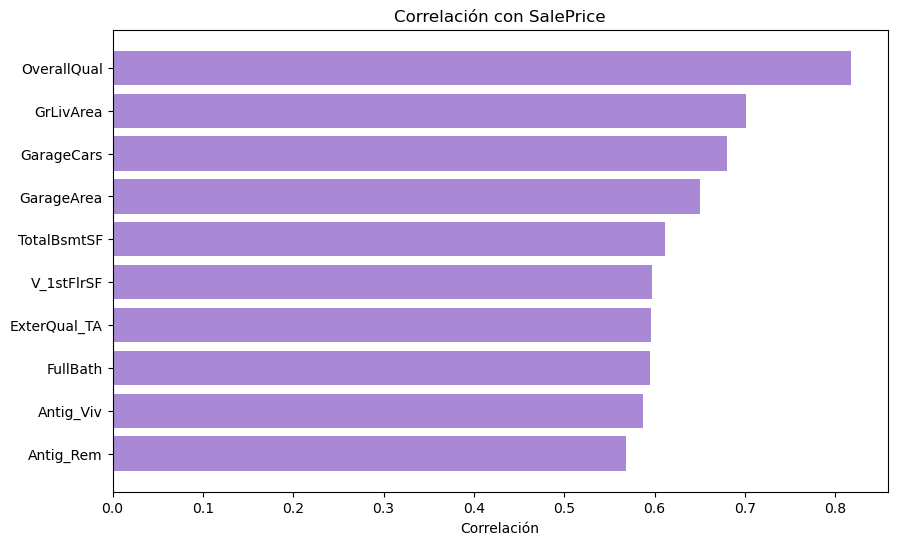

In [94]:
# Grafico el top 10 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:10]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(
    matriz_correlacion_target_graficar.index,
    matriz_correlacion_target_graficar.values,
    color="#A989D6",
)
plt.xlabel("Correlación")
plt.title("Correlación con SalePrice")
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

# Análisis multivariado
¿Cómo es la correlación entre las variables seleccionadas? 

In [95]:
# Elijo el top 10 de variables más correlacionadas con el target
features_selec = matriz_correlacion_target.index[0:10]
features_selec

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       'V_1stFlrSF', 'ExterQual_TA', 'FullBath', 'Antig_Viv', 'Antig_Rem'],
      dtype='object')

<Axes: >

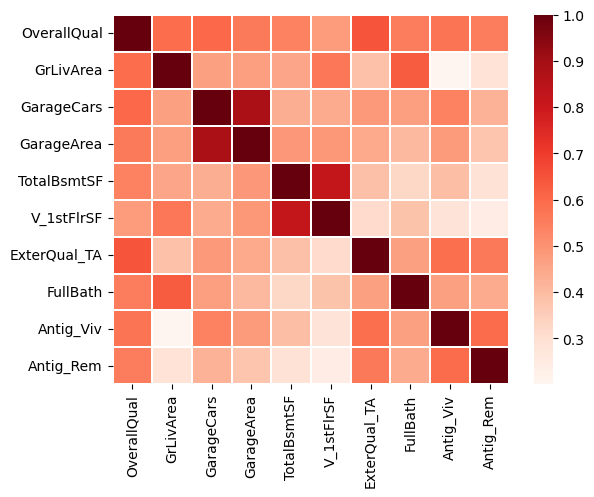

In [96]:
matriz_correlacion = df_analizar[features_selec].corr(method="pearson")
sns.heatmap(
    abs(matriz_correlacion),
    # cbar=False,
    linewidths=0.3,
    cmap="Reds",
)

## Conclusiones de análisis multivariado: 
Debemos tener cuidado cuando dos features tienen elevado coeficiente de correlación, ya que incluir dos variables que tienen información similar puede traer problemas de multicolinealidad. 
<br></br>
Una solución puede ser combinar las variables de alguna manera. 

In [97]:
# Ejemplo para ubicarlos
OverallQual_CORR = matriz_correlacion["OverallQual"]
OverallQual_CORR[(abs(OverallQual_CORR) > 0.6) & (OverallQual_CORR != 1)]

GarageCars      0.600671
ExterQual_TA   -0.646247
Name: OverallQual, dtype: float64

### ¿Qué quiere decir esto? 
OverallQual tiene elevada relación con las variables GarageCars y ExterQual_TA.
<br></br>
**¿Tiene sentido esto?**
<br></br>
* OverallQual: Mide la calidad de finalización y material de la casa. 
* GarageCars: Es el tamaño del garage. 
* ExterQual_TA: Es una binaria que generamos con get_dummies, que indica que la calidad externa de la casa es "TA", es decir típica, cercana al promedio. 
<br></br>
Entonces, son todas variables que hacen referencia a la calidad general de la casa. Quizás sea conveniente combinarlas en una única variable, o simplemente elegir una de ellas. 

# Modelado
**Tener en cuenta:** 
1. TODAS las features que va a recibir el modelo TIENEN QUE SER NÚMEROS.
2. Ninguna variable debe contener valores vacíos


# Chequeos iniciales
Avancemos con el preprocesamiento necesario para convertir todo en números y completar valores vacíos. 

In [98]:
# Chequeemos que sean todos números:
tipos = df_analizar[features_selec].dtypes
tipos.groupby(tipos).size()
### ESTAMOS OK!

uint8    1
int64    9
dtype: int64

In [99]:
# Chequeemos vacíos:
vacios = df_analizar[features_selec].isnull().sum()
vacios[vacios > 0]
# Tengo dos variables con valores vacíos. Completemosla.

Series([], dtype: int64)

In [100]:
# MasVnrArea: Masonry veneer area in square feet
# Voy a reemplazar por la mediana
mediana = df_analizar["MasVnrArea"].median()
df_analizar["MasVnrArea"] = df_analizar["MasVnrArea"].fillna(mediana, inplace=False)

In [101]:
# Chequeo final
vacios = df_analizar[features_selec].isnull().sum()
vacios[vacios > 0]

Series([], dtype: int64)

# Separando la muestra: TRAIN y TEST 
Para evitar problemas de sobreajuste, vamos a proceder a separar la muestra en dos porciones aleatorias. 
<br>

Vamos a usar el paquete sklearn para hacerlo esta vez. 

In [102]:
# Separo usando el paquete sklearn
df_train, df_test = train_test_split(
    df_analizar, test_size=0.3, random_state=42  # Porcentaje de muestra test
)  # Semilla

In [103]:
print("SalePrice_Log Promedio en TRAIN")
print(df_train["SalePrice_Log"].mean())
print("SalePrice_Log Promedio en TEST")
print(df_test["SalePrice_Log"].mean())

SalePrice_Log Promedio en TRAIN
12.0288928429408
SalePrice_Log Promedio en TEST
12.012753036836076


# Modelo 1
Voy a generar un primer modelo (ahora usando el paquete sklearn) con el top 30 de las variables con mayor coeficiente de correlación. 

In [104]:
# Ajusto el modelo
model_formula = "SalePrice_Log ~ " + " + ".join(df_train[features_selec].columns)
lm1 = sm.ols(formula=model_formula, data=df_train).fit()

In [105]:
coeficientes = lm1.params
print("Coeficientes:")
print(coeficientes.head(21).round(6))

Coeficientes:
Intercept       10.933725
OverallQual      0.098146
GrLivArea        0.000220
GarageCars       0.095777
GarageArea       0.000024
TotalBsmtSF      0.000046
V_1stFlrSF       0.000067
ExterQual_TA     0.004794
FullBath        -0.022431
Antig_Viv       -0.001876
Antig_Rem       -0.002199
dtype: float64


In [106]:
pvalores_1 = lm1.pvalues
print("P-Valores:")
print(pvalores_1.head(21).round(6).sort_values(ascending=False))

P-Valores:
ExterQual_TA    0.764449
GarageArea      0.673865
FullBath        0.128964
TotalBsmtSF     0.053596
V_1stFlrSF      0.014157
Intercept       0.000000
OverallQual     0.000000
GrLivArea       0.000000
GarageCars      0.000000
Antig_Viv       0.000000
Antig_Rem       0.000000
dtype: float64


In [107]:
# Genero columna de predicciones
df_train["Pred_1"] = lm1.predict(df_train)
df_test["Pred_1"] = lm1.predict(df_test)

# Modelo 2
Genero un segundo modelo, excluyendo las variables con alto P-Valor (voy a optar por exccluir variables con p-valor arriba de 0.1)

In [108]:
mantener = pvalores_1.index[pvalores_1 <= 0.1]
mantener = mantener[mantener != "Intercept"]
mantener

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'V_1stFlrSF',
       'Antig_Viv', 'Antig_Rem'],
      dtype='object')

In [109]:
# Ajusto el modelo
model_formula = "SalePrice_Log ~ " + " + ".join(df_train[mantener].columns)
lm2 = sm.ols(formula=model_formula, data=df_train).fit()

In [110]:
coeficientes = lm2.params
print("Coeficientes:")
print(coeficientes.head(21).round(6))

Coeficientes:
Intercept      10.914955
OverallQual     0.097516
GrLivArea       0.000208
GarageCars      0.100523
TotalBsmtSF     0.000051
V_1stFlrSF      0.000066
Antig_Viv      -0.001728
Antig_Rem      -0.002104
dtype: float64


In [111]:
pvalores = lm2.pvalues
print("P-Valores:")
print(pvalores.head(21).round(6).sort_values(ascending=False))

P-Valores:
TotalBsmtSF    0.027520
V_1stFlrSF     0.015118
Intercept      0.000000
OverallQual    0.000000
GrLivArea      0.000000
GarageCars     0.000000
Antig_Viv      0.000000
Antig_Rem      0.000000
dtype: float64


In [112]:
# Genero columna de predicciones
df_train["Pred_2"] = lm2.predict(df_train)
df_test["Pred_2"] = lm2.predict(df_test)

# Comparemos los dos modelos 
Hay muchas maneras de decidir si un modelo es superior al otro. 
<br></br>
En el caso particular de regresión, también es de suma importancia interpretar los coeficientes para ver que estén indicando una relación correcta. En este caso no lo vamos a hacer, vamos a dar por "buenas" las relaciones y vamos a limitarnos a estudiar los resultados de ambos algoritmos. 

## Distribuciones
¿Qué distribución tienen las predicciones de cada modelo?

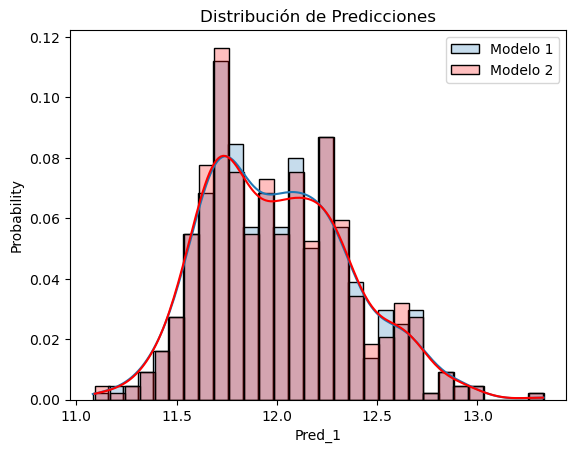

In [113]:
# Luego grafico
plt.figure()
# Histograma
sns.histplot(
    data=df_test,
    x="Pred_1",
    bins=30,
    alpha=0.25,
    kde=True,
    stat="probability",
    label="Modelo 1",
)
sns.histplot(
    data=df_test,
    x="Pred_2",
    bins=30,
    alpha=0.25,
    kde=True,
    stat="probability",
    color="red",
    label="Modelo 2",
)

plt.title("Distribución de Predicciones")
plt.legend()
plt.show()

## Distribución del target por grupo de predicción
Una alternativa visual es ver cómo se distribuye el target en grupos de predicción. Recordemos que la predicción está expresada en logaritmo, así que primero transformemosla en valores reales. Luego, propongamos 5 grupos de predicción: 
* Pred < 100000
* Pred entre 100000 y 125000
* Pred entre 125000 y 150000
* Pred entre 150000 y 200000
* Pred > 200000

In [114]:
# Calculo el exponencial
df_test["Pred_1_exp"] = np.exp(df_test["Pred_1"])
df_test["Pred_2_exp"] = np.exp(df_test["Pred_2"])
df_test["SalePrice"] = np.exp(df_test["SalePrice_Log"])

In [115]:
# Defino cortes
bin_edges = [-9999, 100000, 125000, 150000, 175000, 999999999999]
bin_labels = [
    "< 100.000",
    "100.000 a 125.000",
    "125.000 a 150.000",
    "150.000 a 175.000",
    "> 175.000",
]

# Las categorizo
df_test["Pred_1_Bin"] = pd.cut(
    df_test["Pred_1_exp"], bins=bin_edges, labels=bin_labels, include_lowest=True
)

df_test["Pred_2_Bin"] = pd.cut(
    df_test["Pred_2_exp"], bins=bin_edges, labels=bin_labels, include_lowest=True
)

In [116]:
# Modelo 1
resumen_1 = (
    df_test.groupby("Pred_1_Bin")
    .agg(
        Cant=("SalePrice", "count"),
        Promedio=("SalePrice", "mean"),
        Mediana=("SalePrice", "median"),
    )
    .reset_index()
)
resumen_1

,Pred_1_Bin,Cant,Promedio,Mediana
0,< 100.000,24,88301.875000,89250.0
1,100.000 a 125.000,89,117777.674157,123000.0
2,125.000 a 150.000,84,139128.571429,139000.0
3,150.000 a 175.000,63,160293.492063,156000.0
4,> 175.000,178,249756.325843,225000.0


In [117]:
# Modelo 2
resumen_2 = (
    df_test.groupby("Pred_2_Bin")
    .agg(
        Cant=("SalePrice", "count"),
        Promedio=("SalePrice", "mean"),
        Mediana=("SalePrice", "median"),
    )
    .reset_index()
)
resumen_2

,Pred_2_Bin,Cant,Promedio,Mediana
0,< 100.000,24,88301.875000,89250.0
1,100.000 a 125.000,98,119797.795918,124500.0
2,125.000 a 150.000,72,137214.291667,138500.0
3,150.000 a 175.000,62,159636.935484,155450.0
4,> 175.000,182,248390.252747,224450.0


## Métricas
Calculemos el R cuadrado y el RMSE. 

In [118]:
rmse_1_test = mean_squared_error(
    df_test["SalePrice_Log"], df_test["Pred_1"], squared=False
)
r_squared_1_test = r2_score(df_test["SalePrice_Log"], df_test["Pred_1"])
rmse_1_train = mean_squared_error(
    df_train["SalePrice_Log"], df_train["Pred_1"], squared=False
)
r_squared_1_train = r2_score(df_train["SalePrice_Log"], df_train["Pred_1"])

In [119]:
rmse_2_test = mean_squared_error(
    df_test["SalePrice_Log"], df_test["Pred_2"], squared=False
)
r_squared_2_test = r2_score(df_test["SalePrice_Log"], df_test["Pred_2"])
rmse_2_train = mean_squared_error(
    df_train["SalePrice_Log"], df_train["Pred_2"], squared=False
)
r_squared_2_train = r2_score(df_train["SalePrice_Log"], df_train["Pred_2"])

In [120]:
metricas = pd.DataFrame(columns=["Poblacion", "Metrica", "Modelo", "Valor"])

In [121]:
# RMSE
nuevo_dato = {"Poblacion": "TEST", "Metrica": "RMSE", "Modelo": 1, "Valor": rmse_1_test}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {
    "Poblacion": "TRAIN",
    "Metrica": "RMSE",
    "Modelo": 1,
    "Valor": rmse_1_train,
}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {"Poblacion": "TEST", "Metrica": "RMSE", "Modelo": 2, "Valor": rmse_2_test}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {
    "Poblacion": "TRAIN",
    "Metrica": "RMSE",
    "Modelo": 2,
    "Valor": rmse_2_train,
}
metricas = metricas.append(nuevo_dato, ignore_index=True)

C:\Users\usernosis\AppData\Local\Temp\ipykernel_15748\1839116436.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
C:\Users\usernosis\AppData\Local\Temp\ipykernel_15748\1839116436.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
C:\Users\usernosis\AppData\Local\Temp\ipykernel_15748\1839116436.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
C:\Users\usernosis\AppData\Local\Temp\ipykernel_15748\1839116436.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [122]:
# R CUADRADO
nuevo_dato = {
    "Poblacion": "TEST",
    "Metrica": "R-2",
    "Modelo": 1,
    "Valor": r_squared_1_test,
}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {
    "Poblacion": "TRAIN",
    "Metrica": "R-2",
    "Modelo": 1,
    "Valor": r_squared_1_train,
}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {
    "Poblacion": "TEST",
    "Metrica": "R-2",
    "Modelo": 2,
    "Valor": r_squared_2_test,
}
metricas = metricas.append(nuevo_dato, ignore_index=True)

nuevo_dato = {
    "Poblacion": "TRAIN",
    "Metrica": "R-2",
    "Modelo": 2,
    "Valor": r_squared_2_train,
}
metricas = metricas.append(nuevo_dato, ignore_index=True)

C:\Users\usernosis\AppData\Local\Temp\ipykernel_15748\2494225854.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
C:\Users\usernosis\AppData\Local\Temp\ipykernel_15748\2494225854.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
C:\Users\usernosis\AppData\Local\Temp\ipykernel_15748\2494225854.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(nuevo_dato, ignore_index=True)
C:\Users\usernosis\AppData\Local\Temp\ipykernel_15748\2494225854.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [123]:
metricas

,Poblacion,Metrica,Modelo,Valor
0,TEST,RMSE,1,0.163584
1,TRAIN,RMSE,1,0.172880
2,TEST,RMSE,2,0.163595
3,TRAIN,RMSE,2,0.173116
4,TEST,R-2,1,0.842262
5,TRAIN,R-2,1,0.807185
6,TEST,R-2,2,0.842240
7,TRAIN,R-2,2,0.806657


Text(0, 0.5, 'R-2')

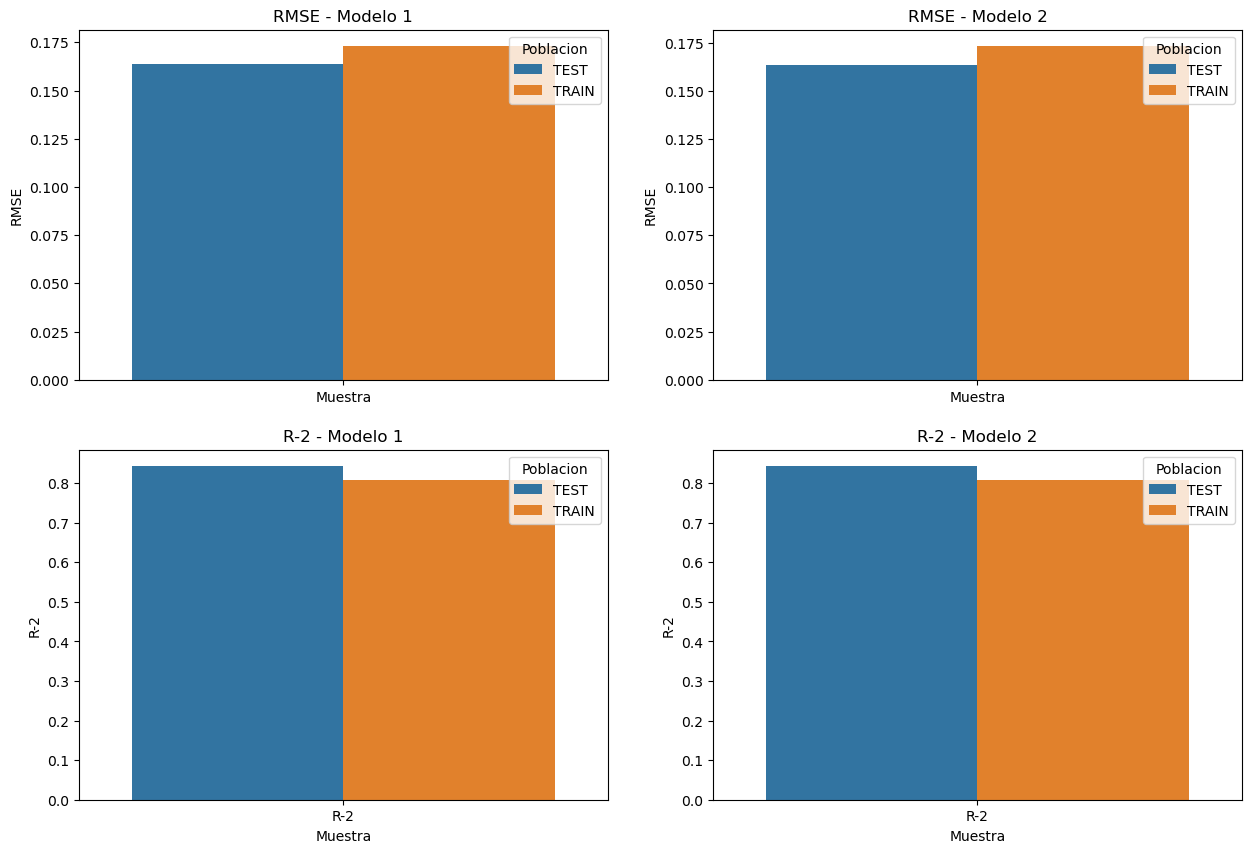

In [124]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True, sharey=False)

rmse_mod1 = (metricas["Metrica"] == "RMSE") & (metricas["Modelo"] == 1)
rmse_mod2 = (metricas["Metrica"] == "RMSE") & (metricas["Modelo"] == 2)
r_2_mod1 = (metricas["Metrica"] == "R-2") & (metricas["Modelo"] == 1)
r_2_mod2 = (metricas["Metrica"] == "R-2") & (metricas["Modelo"] == 2)

sns.barplot(
    data=metricas[rmse_mod1], x="Metrica", y="Valor", hue="Poblacion", ax=ax[0, 0]
)
ax[0, 0].set_title("RMSE - Modelo 1")
ax[0, 0].set_xlabel("Muestra")
ax[0, 0].set_ylabel("RMSE")

sns.barplot(
    data=metricas[rmse_mod2], x="Metrica", y="Valor", hue="Poblacion", ax=ax[0, 1]
)
ax[0, 1].set_title("RMSE - Modelo 2")
ax[0, 1].set_xlabel("Muestra")
ax[0, 1].set_ylabel("RMSE")

sns.barplot(
    data=metricas[r_2_mod1], x="Metrica", y="Valor", hue="Poblacion", ax=ax[1, 0]
)
ax[1, 0].set_title("R-2 - Modelo 1")
ax[1, 0].set_xlabel("Muestra")
ax[1, 0].set_ylabel("R-2")

sns.barplot(
    data=metricas[r_2_mod2], x="Metrica", y="Valor", hue="Poblacion", ax=ax[1, 1]
)
ax[1, 1].set_title("R-2 - Modelo 2")
ax[1, 1].set_xlabel("Muestra")
ax[1, 1].set_ylabel("R-2")